# Project: We Rate Dogs de Twitter


### Table of Contents
<ul>
    <li><a href="#intro">Introduction</a></li>
    <li><a href="#gather">Collecte de données</a></li>
    <li><a href="#asses">Evaluation des données</a></li> 
        <ol>
            <li><a href="#asses1">Evaluation Visuelle</a></li>
            <li><a href="#asses2">Evaluation Programmatique</a></li>
            <li><a href="#asses3">Résumé des Problèmes</a></li>
        </ol>
</ul>
<ul>    
    <li><a href="#clean">Nettoyage de données</a></li>
    <li><a href="#store">Stockage des données</a></li>
    <li><a href="#da">Analyse et Visualisation</a></li>
    <li><a href="#concl">Conclusions</a></li>
</ul>

<a id='intro'></a> 
## Introduction:

> L’ensemble de données que nous allons traiter (analyser et visualiser) est l’archive de tweets de l’utilisateur de Twitter @dog_rates, également connu sous le nom de WeRateDogs.C'est un compte Twitter qui évalue les chiens des gens avec un commentaire humoristique sur le chien, ceux-ci rangé dans trois ensemblede données de types différent. Notre objectif est de mélanger ses données d'archives à partir de différentes sources pour créer une trame de données propre, puis d'effectuer une analyse et une visualisation des données pour la trame de données résultante.
 

In [1]:
# Importation des Bibliothéques
import numpy as np
import pandas as pd
import requests
import matplotlib.pyplot as plt
import datetime
import json
import os
import re
from matplotlib import rcParams
import seaborn as sns
%matplotlib inline
import random
from pandas import *

<a id='gather'></a>
## Collecte des Données
Dans cette cellule, nous allons rassembler **les trois** données pour ce projet et les chargez dans le bloc-notes. 
**Remarque :** Biensur les méthodes requises pour recueillir chaque donnée sont différentes.

#### <font color = blue> a. Le fichier .CSV (twitter_archive_enhanced.csv)

In [2]:
# Lire le fichier .csv dans le dataframe twitter-archive-enhanced à l'aide de pd.read_csv :
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')

#### <font color = blue> b. Le fichier .TSV (image_predictions.tsv)

In [3]:
# Lire le fichier .tsv dans le dataframe image-predictions à l'aide de pd.read_csv en ajoutant sep "\t" :
image_pred = pd.read_csv('image-predictions.tsv', sep ='\t')

#### <font color = blue> c. Le fichier JSON issu de Twitter API par UDACITY (tweet_json.txt)

In [4]:
# Lire le fichier tweet-json.txt, ligne par ligne, et créez une liste de dictionnaires :
# Comme définit dans le cours nous allons ressortir uniquement ligne par ligne dans un tableau de 
# données pandas avec (au minimum) l’ID du tweet, le nombre de retweets et le nombre de favoris.
twitter_api = []
with open ('tweet-json.txt', 'r') as file:
    for line in file:
        tweet = json.loads(line)
        
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        favorite_count = tweet['favorite_count']
        
        twitter_api.append({'tweet_id' : tweet_id,
                         'retweet_count' : retweet_count,
                         'favorite_count':favorite_count})

In [5]:
#Lisez le fichier .json dans la trame de données twitter_api :
twitter_api = pd.DataFrame(twitter_api)

####  Nous avons nos trois dataframes : `twitter_arch` `image_pred` `twitter_api`
 > Effectuons une évaluation visuel et programmatique   

<a id='asses'></a> 
## Evaluation des Données:
Dans cette section, nous allons détectez et documentez au moins **huit (8) problèmes de qualité et deux (2) problèmes de Propreté ou structure**. En utilisant les techniques d'évaluation vue en cours à savoir: **l'évaluation visuelle** et **l'évaluation programmatique**.

**Remarques :** faire attention aux points clés suivants:

* Vous ne voulez que des notes originales (pas de retweets) qui ont des images. Bien qu'il y ait plus de 5000 tweets dans l'ensemble de données, tous ne sont pas des évaluations de chiens et certains sont des retweets.
* L'évaluation et le nettoyage complet de l'ensemble de données prendraient beaucoup de temps et il n'est pas nécessaire de pratiquer et de démontrer vos compétences en matière de traitement des données. Par conséquent, les exigences de ce projet consistent uniquement à évaluer et à éliminer au moins 8 problèmes de qualité et au moins 2 problèmes d'ordre dans cet ensemble de données.
* Le fait que les numérateurs de notation soient supérieurs aux dénominateurs n'a pas besoin d'être nettoyé. Ce [système de notation unique] (http://knowyourmeme.com/memes/theyre-good-dogs-brent) est une grande partie de la popularité de WeRateDogs.
* Vous n'avez pas besoin de collecter les tweets au-delà du 1er août 2017. Vous le pouvez, mais notez que vous ne pourrez pas collecter les prédictions d'images pour ces tweets puisque vous n'avez pas accès à l'algorithme utilisé.


<a id ="asses1"></a>
### <font color = blue>1- Evaluation Visuelle

#### a- Le fichier `twitter_arch`

In [6]:
# Afficher les données de twitter_arch
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


#### **Observations 1:**

- Problémes de valeurs incorrectes dans: 'name' (un nom commence toujours par la majuscule donc présence des noms différents de ceux des chiens).
- J'ai remarqué que certaines valeurs dans rating_numerator sont inférieur à 10
- Trouvez un moyen de filtrer les retweets des tweets.
- on observe déja assez de valeurs manquantes dans certaines colonnes comme: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id et retweeted_status_timestamp
- Valeur incohérente 'None' un peu partout
- Des colonnes à supprimer car ne servent pas réellement dans l'analyse

#### b- Le fichier `image_pred`

In [7]:
# Afficher les données de image_pred
image_pred

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


#### **Observations 2:**

- Problémes de valeurs incorrectes dans: 'p1', 'p2', et 'p3'(une lettre majuscule et une lettre minuscule) incohérence
- Les colonnes P-conf contienne des valeurs non caractérisé
- La présence des colonnes superflus à supprimer
- incompatibilité entre le nombre de tweet resencer en image et ceux archiver dans le fichier csv
- identifiant manquants de 2075 à 2353

#### c- Le fichier `twitter_api`

In [8]:
# Afficher les données de twitter_api
twitter_api

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


#### **Observations 3:**

- Pas grand chose observables à l'oeil ici juste que le nombre de tweet aussi ne correspond pas aux autres dataframes
- identifiant manquant de 2354 à 2355

<a id ="asses2"></a>
### <font color = blue>2- Evaluation Programmatique

#### a- Le fichier `twitter_arch`

In [9]:
# Utilisez .info() pour observé les types de données et les valeurs manquantes
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [10]:
# Vérifier les doublons
twitter_arch.duplicated().sum()

0

In [11]:
# Obtenir des données statistiques pour les valeurs numériques
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# Compter le nombre d'apparition de chaque valeur de la colonne name
twitter_arch.name.value_counts()

None          745
a              55
Charlie        12
Cooper         11
Lucy           11
             ... 
Dex             1
Ace             1
Tayzie          1
Grizzie         1
Christoper      1
Name: name, Length: 957, dtype: int64

In [13]:
# Compter le nombre d'apparition de chaque valeur de la colonne rating_denominator
twitter_arch.rating_denominator.value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

In [14]:
# Compter le nombre d'apparition de chaque valeur de la colonne rating_numerator
twitter_arch.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
2         9
1         9
75        2
15        2
420       2
0         2
80        1
144       1
17        1
26        1
20        1
121       1
143       1
44        1
60        1
45        1
50        1
99        1
204       1
1776      1
165       1
666       1
27        1
182       1
24        1
960       1
84        1
88        1
Name: rating_numerator, dtype: int64

In [15]:
# Compter le nombre de valeur manquantes
twitter_arch.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [16]:
# Compter le nombre de repétition des différentes valeurs de source
twitter_arch.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [17]:
# Compter le nombre de valeur unique de chaque colonne de données
twitter_arch.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [18]:
# Afficher les valeurs de expanded_urls
twitter_arch.expanded_urls.value_counts()

https://twitter.com/dog_rates/status/667152164079423490/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/718631497683582976/photo/1                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1,https://twitter.com/dog_rates/status/783839966405230592/photo/1                                                                    2
https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_rates/status/774314403806253056/photo/1,https://twitter.com/dog_r

In [19]:
# Afficher une valeur possible de text du dataframe pour observer les informations fournit
twitter_arch.text[15]

"This is Oliver. You're witnessing one of his many brutal attacks. Seems to be playing with his victim. 13/10 fr*ckin frightening #BarkWeek https://t.co/WpHvrQedPb"

#### **Observations 1:**

- J'ai remarqué que certaines valeurs dans rating_denominator sont inférieur ou supérieur à 10
- tweet_id doit être "string" et non "int"
- certaines valeurs dans la colonne rating_numerator sont abérantes car trop grande
- 'timestamp' doit être "data time" et non "float64"
- retweeted_status_id doit être supprimé car nous nous intéressons au tweet et beaucoup de valeur manquantes
- retweeted_status_user_id doit être supprimé car nous nous intéressons au tweet et beaucoup de valeur manquantes
- retweeted_status_timestamp doit être supprimé car nous nous intéressons au tweet et beaucoup de valeur manquantes
- Valeurs Nulls représentés par (None) dans la colonne de nom
- des noms étranges comme ('a' , 'an') dans la colonne des noms
- Extraire uniquement les sources fiables (Twitter pour iPhone, Twitter Web Client ou TweetDeck) de la colonne source.
- Retrouver les vrai liens de tweet car certains sont doubler 
- Faire fusionner les colonnes: doggo, floofer, pupper et puppo 

#### b- Le fichier `image_pred`

In [20]:
# Utilisez .info() pour observé les types de données et les valeurs manquantes
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 119.6+ KB


In [21]:
# Vérifier les doublons
image_pred.duplicated().sum()

0

In [22]:
# Obtenir des statistiques pour les valeurs numériques
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#### **Observations 2:**

- le type de données de tweet_id est int, il doit être en chaîne de caractére

#### c- Le fichier `twitter_api`

In [23]:
# Utilisez .info() pour observé les types de données et les valeurs manquantes
twitter_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.2 KB


In [24]:
# Vérifier les doublons
twitter_api.duplicated().sum()

0

In [25]:
# Obtenir des statistiques pour les valeurs numériques
twitter_api.describe()

,tweet_id,retweet_count,favorite_count
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,3164.797366,8080.968564
std,6.852812e+16,5284.770364,11814.771334
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,624.500000,1415.000000
50%,7.194596e+17,1473.500000,3603.500000
75%,7.993058e+17,3652.000000,10122.250000
max,8.924206e+17,79515.000000,132810.000000


#### **Observations 3:**

- Modifiez le type de données de tweet_id en chaîne

<a id ="asses3"></a>
### <font color = blue>3- Résumé des Problèmes

### Problèmes de Qualités
**1.** Supprimer les valeurs non null dans in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp après les avoir filtrés uniquement sur les tweets dans `twitter_arch` OK

**2.** tweet_id doit être "string" et non "int" dans les 3 dataframes OK

**3.** Modifier le type de 'timestamp' qui doit être "data time" et non "float64" dans `twitter_arch`OK

**4.** Supprimer des noms étranges comme ('a' , 'an') dans la colonne 'name' dans `twitter_arch` OK

**5.** Certaines des lignes expand_urls ont 2 URL et nous avons juste besoin d'un lien tweeter dans `twitter_arch` OK

**6.** Les valeurs de source sont cachés dans le lien dans `twitter_arch` OK

**7.** Certaines valeurs dans la colonne rating_denominator ne sont pas "10" dans `twitter_arch` OK

**8.** Certaines valeurs dans la colonne rating_numerator inférieures à "10" dans `twitter_arch` OK

**9.** les noms des colonnes p1, p2, p3 commencent par des lettres majuscules et lettres minuscules `image_pred` OK

**10.** Certaines tweets d'informations n'ont pas de liens tweet dans `twitter_arch` OK

### Problèmes de Propreté ou de Structure
**1.** Faire fusionner les colonnes doggo, floofer, pupper et puppo dans une colonne et non 4 OK

**2.** Supprimer les colonnes rating_denominator et text peut utiles de l'analyse dans la suite OK

**3.** Les 9 colonnes de `image_pred` sont de trop alors transformer ces données afin qu'ils soient un peu plus clair et compréhensible .  OK

<a id ="clean"></a>
## Nettoyage de données
Dans cette section, nous allons procéder au nettoyage de **tous** les problèmes documentés lors de l'évaluation.

**Remarque :** En prenant soins de faire une copie des données d'origine avant le nettoyage. Le nettoyage comprend la fusion de données individuelles. Le résultat devrait être un maître pandas DataFrame de haute qualité et bien rangé (ou DataFrames, le cas échéant).

In [26]:
# Faire des copies des données originales de chacunes des ensembles de données
arch_copy = twitter_arch.copy()
pred_copy = image_pred.copy()
api_copy = twitter_api.copy()

### <font color = green>Problèmes de Qualités

#### Problème 1: 
> Supprimer les valeurs non null dans in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id & retweeted_status_timestamp après les avoir filtrés uniquement sur les tweets dans `arch_copy`

#### Define: 
Nous devons supprimer dans in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id et retweeted_status_timestamp tous les retweets et conserver uniquement les valeurs Nulles puis supprimer ces colonnes dans `arch_copy`

#### Code

In [27]:
# Créez une boucle pour filtrer les valeurs NaN, puis supprimez les colonnes aprés
list = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id',
        'retweeted_status_user_id', 'retweeted_status_timestamp']

for i in list:
    arch_copy = arch_copy[arch_copy[i].isnull()]
    arch_copy = arch_copy.drop([i], axis = 1)

#### Test

In [28]:
# Vérifier que les colonnes ont été supprimer
arch_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer',
       'pupper', 'puppo'],
      dtype='object')

In [29]:
# S'Assurez que le nombres de lignes et de colonnes a diminuer
arch_copy.shape

(2097, 12)

#### Problèmes 2: 
> tweet_id doit être "string" et non "int" dans les 3 dataframes

#### Define 
Changez le type de données de tweet_id en chaîne dans les 3 dataframes (`arch_copy`, `pred_copy`, `api_copy`) car c'est l'identifiant principale des données

#### Code

In [30]:
# Modification de type avec astype
arch_copy.tweet_id = arch_copy.tweet_id.astype(str)
pred_copy['tweet_id'] = pred_copy['tweet_id'].astype(str)
api_copy.tweet_id = api_copy.tweet_id.astype(str)

#### Test

In [31]:
# Vérifier le nouveau type de tweet_id dans arch_copy
type(arch_copy['tweet_id'][0])

str

In [32]:
# Vérifier le nouveau type de tweet_id dans pred_copy
type(pred_copy['tweet_id'][0])

str

In [33]:
# Vérifier le nouveau type de tweet_id dans api_copy
type(api_copy['tweet_id'][0])

str

#### Problèmes 3: 
> le type de 'timestamp' ne doit pas être "float64" dans `twitter_arch`

#### Define 
Modifions le type de 'timestamp' dans `twitter_arch`

#### Code

In [34]:
# Faire appel à la bibliothéques date times et modifier le type de timestamp
arch_copy['timestamp']= pd.to_datetime(arch_copy['timestamp'])

#### Test

In [35]:
# Vérifier le nouveau type de timestamp
arch_copy.timestamp.dtype

datetime64[ns, UTC]

#### Problèmes 4: 
> Présence des noms étranges comme ('a' , 'an') dans la colonne 'name' dans `arch_copy`

#### Define
- Exttraire les vrais noms de chiens du texte et supprimez les autres valeurs dans`arch_copy`

#### Code

In [36]:
# Afficher quelques lignes de text
arch_copy.text.sample(15)

839     I don't know any of the backstory behind this ...
1044    Meet Stark. He just had his first ice cream co...
1260    The squad is back for St. Patrick's Day! ☘ 💚\n...
788     I WAS SENT THE ACTUAL DOG IN THE PROFILE PIC B...
2161    This is a Coriander Baton Rouge named Alfredo....
120     Meet Stanley. He likes road trips. Will shift ...
379     This is Boots. She doesn't know what to do wit...
2261    Never seen dog like this. Breathes heavy. Tilt...
2236    Fun dogs here. Top one clearly an athlete. Bot...
2053    Meet Penelope. She is a white Macadamias Duode...
1233    This is Stubert. He just arrived. 10/10 https:...
580     Here's a very sleepy pupper. Appears to be por...
400     This is Scooter. His lack of opposable thumbs ...
1007    This is Bookstore and Seaweed. Bookstore is ti...
1041    This is Geno. He's a Wrinkled Baklavian Velvee...
Name: text, dtype: object

In [37]:
# Extraire les noms de chien du texte dans une nouvelle colonne nommer nom_chien
arch_copy['nom_chien'] = arch_copy.text.str.extract(
    "((?<= named )[A-Z][a-z]+| (?<= [i,']s )[A-Z][a-z]+| (?<=[M,m]eet )[A-Z][a-z]+| (?<= to )[A-Z][a-z]+)", expand = True)

In [38]:
# Visualiser les données obtenus
arch_copy.nom_chien.value_counts()

 Lucy       11
 Charlie    11
 Oliver     11
 Cooper     10
 Penny       9
            ..
 Beya        1
 Zooey       1
 Kayla       1
 Quinn       1
 Netflix     1
Name: nom_chien, Length: 957, dtype: int64

In [39]:
# Voir s'il y'a toujours des colonnes vides
arch_copy['nom_chien'].isnull().sum()

674

In [40]:
# Afficher le nombre de noms de la nouvelle colonne nom_chien
arch_copy.nom_chien.str.istitle().sum() - arch_copy.query('nom_chien == "None"').count()[0]

1423

In [41]:
# Afficher le nombre de noms de l'ancienne colonne name
arch_copy.name.str.istitle().sum() - arch_copy.query('name == "None"').count()[0]

1384

Remarque : il y'a plus de valeur dans la nouvelle colonne que dans l'ancienne

In [42]:
# Supprimer la colonne name
arch_copy = arch_copy.drop(['name'], axis = 1)

#### Test

In [43]:
# Vérifier qu'il n'est plus présent
arch_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'doggo', 'floofer', 'pupper',
       'puppo', 'nom_chien'],
      dtype='object')

#### Problèmes 5: 
> Certaines des lignes expand_urls ont 2 URL donc retrouuver les vrai lien dans `arch_copy`

#### Define
- Extraire le vrai lien du Tweet du texte dans `arch_copy`

#### Code

In [44]:
# Montrez quelques exemples de liens
arch_copy.text.sample(1)

502    This is Baron. He's officially festive as h*ck...
Name: text, dtype: object

In [45]:
# Créer une nouvelle colonne et utiliser regex pour extraire les liens du texte
arch_copy['lien'] = arch_copy.text.str.extract("(https://t.co/[a-zA-Z0-9-]+)", expand = True)

In [46]:
# Supprimer la colonne expand_urls
arch_copy = arch_copy.drop(['expanded_urls'], axis = 1)

#### Test

In [47]:
# Tester les valeur présente 
arch_copy['lien'].sample(3)

660    https://t.co/GGJvxYt3xK
296    https://t.co/uNmxbL2lns
699    https://t.co/ObT2tSxXit
Name: lien, dtype: object

In [48]:
# Vérifier la suppréssion de la colonne
arch_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'doggo', 'floofer', 'pupper', 'puppo',
       'nom_chien', 'lien'],
      dtype='object')

#### Problèmes 6:
> Les valeurs de source sont cachés dans le lien dans `twitter_arch`

#### Define
- Utilisez regex pour extraire la source (Twitter pour iPhone, Twitter Web Client ou TweetDeck) de la colonne source dans`arch_copy`

#### Code

In [49]:
# Extraire les source réel dans les données de la colonne source
arch_copy.source = arch_copy.source.str.extract(r"(?<=>)(.*)(?=<)")

#### Test

In [50]:
# vérifier les valeurs de la colonne source
arch_copy.source.value_counts()

Twitter for iPhone     1964
Vine - Make a Scene      91
Twitter Web Client       31
TweetDeck                11
Name: source, dtype: int64

#### Problèmes 7:
> Certaines valeurs dans la colonne rating_denominator sont différentes de 10 dans `twitter_arch`

#### Define
- Vérifier les valeurs de rating_denominator puis supprimer toutes celles différentes de 10

#### Code

In [51]:
# Afficher la liste des valeurs uniques de rating_denominator
arch_copy.rating_denominator.value_counts()

10     2080
50        3
11        2
80        2
70        1
7         1
150       1
170       1
20        1
90        1
40        1
110       1
120       1
2         1
Name: rating_denominator, dtype: int64

In [52]:
# Identifier tous les "rating_denominator" différent de 10 
denom = arch_copy[arch_copy['rating_denominator'] != 10].index

# Supprimer tous les valeurs de "rating_denominator" différent de 10 
arch_copy.drop(denom , inplace = True )

#### Test

In [53]:
# Vérifier les valeurs de "rating_denominator"
arch_copy.rating_denominator.value_counts()

10    2080
Name: rating_denominator, dtype: int64

#### Problèmes 8:
> Certaines valeurs dans la colonne rating_numerator sont trop grande ou zéro dans `twitter_arch`

#### Define
- Lister les valeurs de rating_numerator puis trier celles pouvant être rectifier et le reste les supprimer

#### Code

In [54]:
# Lister les valeurs de "rating_numerator"
arch_copy.rating_numerator.value_counts()

12      486
10      436
11      413
13      287
9       152
8        98
7        51
14       38
5        34
6        32
3        19
4        15
2         9
1         4
27        1
75        1
0         1
1776      1
26        1
420       1
Name: rating_numerator, dtype: int64

In [55]:
# Afficher la ligne ayant pour rating numerator 0 
arch_copy[arch_copy['rating_numerator'] == 0 ]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,nom_chien,lien
315,835152434251116546,2017-02-24 15:40:31+00:00,Twitter for iPhone,When you're so blinded by your systematic plag...,0,10,None,None,None,None,NaN,https://t.co/YbEJPkg4Ag


In [56]:
# Afficher les lignes ayant pour rating_numerator > 15
arch_copy[arch_copy['rating_numerator'] > 15]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,nom_chien,lien
695,786709082849828864,2016-10-13 23:23:56+00:00,Twitter for iPhone,"This is Logan, the Chow who lived. He solemnly...",75,10,None,None,None,None,Logan,https://t.co/yBO5wuqaPS
763,778027034220126208,2016-09-20 00:24:34+00:00,Twitter for iPhone,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10,None,None,pupper,None,Sophie,https://t.co/QFaUiIHxHq
979,749981277374128128,2016-07-04 15:00:45+00:00,TweetDeck,This is Atticus. He's quite simply America af....,1776,10,None,None,None,None,Atticus,https://t.co/GRXwMxLBkh
1712,680494726643068929,2015-12-25 21:06:00+00:00,Twitter for iPhone,Here we have uncovered an entire battalion of ...,26,10,None,None,None,None,NaN,https://t.co/eNm2S6p9BD
2074,670842764863651840,2015-11-29 05:52:33+00:00,Twitter for iPhone,After so many requests... here you go.\n\nGood...,420,10,None,None,None,None,NaN,https://t.co/yfAAo1gdeY


In [57]:
# Vérifier ces valeurs de rating_numerator chaque id 
# avec les informations contenu dans le text de chacun
# Observer la valeur de l'id 315
arch_copy[arch_copy['rating_numerator'] == 0].loc[315,'text']

"When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag"

In [58]:
# Observer la valeur de l'id 695
arch_copy[arch_copy['rating_numerator'] > 15].loc[695,'text']

"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS"

In [59]:
# Remplacer la valeur de l'id 695 par la bonne valeur qui est 9.75
arch_copy.loc[695 , 'rating_numerator'] = 9.75
# Observer la valeur de l'id 763
arch_copy[arch_copy['rating_numerator'] > 15].loc[763,'text']

"This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq"

In [60]:
# Remplacer la valeur de l'id 763 par la bonne valeur qui est 11.27
arch_copy.loc[763 , 'rating_numerator'] = 11.27
# Observer la valeur de l'id 979
arch_copy[arch_copy['rating_numerator'] > 15].loc[979,'text']

"This is Atticus. He's quite simply America af. 1776/10 https://t.co/GRXwMxLBkh"

In [61]:
# Observer la valeur de l'id 1712
arch_copy[arch_copy['rating_numerator'] > 15].loc[1712,'text']

'Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD'

In [62]:
# Remplacer la valeur de l'id 1712 par la bonne valeur qui est 11.26
arch_copy.loc[1712 , 'rating_numerator'] = 11.26
# Observer la valeur de l'id 2074
arch_copy[arch_copy['rating_numerator'] > 15].loc[2074,'text']

'After so many requests... here you go.\n\nGood dogg. 420/10 https://t.co/yfAAo1gdeY'

In [63]:
# Casser le reste des valeurs de reting_numerator supérieur à 15 dans une liste d'index
numerator= arch_copy[arch_copy['rating_numerator'] > 15].index

# Supprimer tous leslinges donc la valeurs de "rating_numerator" > 15 et == 0
# car ce sont des valeurs abérantes 
arch_copy.drop(numerator , inplace = True )
arch_copy.drop(arch_copy[arch_copy['rating_numerator'] == 0].index, inplace = True )

#### Test

In [64]:
# Vérifier qu'il n y a plus de lignes ayant pour rating_numerator > 15
arch_copy[arch_copy['rating_numerator'] > 15]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,nom_chien,lien


In [65]:
# Vérifier qu'il n y a plus de lignes ayant pour rating_numerator == 0
arch_copy[arch_copy['rating_numerator'] == 0]

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,doggo,floofer,pupper,puppo,nom_chien,lien


#### Problèmes 9:
> Les Noms contenu dans les colonnes p1, p2, et p3 commence par des majuscules et des minuscules

#### Define
- Mettre la premiére lettre de tous les noms des colonnes p1, p2, p3 en majuscule

#### Code

In [66]:
pred_copy.p1 = pred_copy.p1.str.title()
pred_copy.p2 = pred_copy.p2.str.title()
pred_copy.p3 = pred_copy.p3.str.title()

#### Test

In [67]:
pred_copy

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_Springer_Spaniel,0.465074,True,Collie,0.156665,True,Shetland_Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature_Pinscher,0.074192,True,Rhodesian_Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature_Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature_Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712,True,English_Springer,0.225770,True,German_Short-Haired_Pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Paper_Towel,0.170278,False,Labrador_Retriever,0.168086,True,Spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,Malamute,0.078253,True,Kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,Papillon,0.068957,True


#### Problèmes 10:
> Source d'informations sans liens 

#### Define
- Supprimer les source d'informations qui n'ont pas de liens tweet

#### Code

In [68]:
# Afficher le nombre de tweet sans liens de tweet
arch_copy['lien'].isnull().sum()

3

In [69]:
# Supprimer ces tweet sans liens de tweet
arch_copy.drop(arch_copy[arch_copy['lien'].isnull()].index, inplace = True )

#### Test

In [70]:
# Vérifier la suppression des tweets sans liens de tweet
arch_copy['lien'].isnull().sum()

0

### <font color = green>Problèmes de Propreté ou de structure

#### Problèmes 1:
> Faire fusionner les colonnes doggo, floofer, pupper et puppo dans une colonne et non 4 

#### Define
- Créer une nouvelle colonne nommer race_chien ou nous allons ranger les valeur de doggo, flooter, pupper et de puppo puis supprimer ces 4 colonnes

#### Code

In [71]:
# Créer une liste contenant les 4 colonnes doggo, puppo, pupper et flooter
race_chiens = ['doggo', 'puppo', 'pupper', 'floofer']

# Créer une boucle pour remplacer None dans les 4 colonnes par le vide ''
for i in race_chiens:
    arch_copy[i] = arch_copy[i].replace('None','')

In [72]:
# Créer une nouvelle colonne et ranger les valeur concatener des 4 colonnes
arch_copy['race_chiens'] = arch_copy['doggo'] + arch_copy['puppo'] + arch_copy['pupper'] + arch_copy['floofer']

#### Test

In [73]:
arch_copy['race_chiens'].value_counts()

                1739
pupper           220
doggo             72
puppo             23
floofer            9
doggopupper        9
doggopuppo         1
doggofloofer       1
Name: race_chiens, dtype: int64

- On observe qu'il y' a beaucoup de valeurs nulles et des valeurs incohérentes 

#### Code 2

In [74]:
# Créer une nouvelle colonne et Extraire les race de chien depuis le texte contenu dans la colonne text
arch_copy['Dog_stage'] = arch_copy['text'].str.extract('(doggo|floofer|pupper|puppo)')

In [75]:
arch_copy['Dog_stage'].value_counts()

pupper     234
doggo       79
puppo       29
floofer      4
Name: Dog_stage, dtype: int64

In [76]:
# Vérification du nombre de valeur nulles
arch_copy['Dog_stage'].isnull().sum()

1728

- On observe qu'avec le texte on a moins de valeurs null déjà et pas de mauvaise valeurs comme doggopupper, doggopuppo et doggofloofer donc nous allons supprimer celle créer à partir des données des 4 colonnes, les 4 colonnes aussi et conservé celle issu du text

In [77]:
arch_copy = arch_copy.drop(columns=['doggo','floofer','pupper','puppo','race_chiens'])

#### Test

In [78]:
arch_copy.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'nom_chien', 'lien', 'Dog_stage'],
      dtype='object')

#### Problèmes 2:
> Supprimer la colonne 'rating_denominator' et 'text' car l'une n'a plus qu'une seule valeur et l'autre ne servira réellement plus dans la suite

#### Define
- Supprimer la colonne 'rating_denominator' et 'text' avec la commande drop

#### Code

In [79]:
# Suppression des colonne rating_denominator et text
arch_copy = arch_copy.drop(columns=['rating_denominator','text'])

#### Test

In [80]:
# Vérification de la suppression effective des colonnes indexer
arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2074 non-null   object             
 1   timestamp         2074 non-null   datetime64[ns, UTC]
 2   source            2074 non-null   object             
 3   rating_numerator  2074 non-null   float64            
 4   nom_chien         1418 non-null   object             
 5   lien              2074 non-null   object             
 6   Dog_stage         346 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 89.1+ KB


#### Problèmes 3:
> Les 9 colonnes de `pred_copy` sont de trop alors restructuré et ne garder qu'un bloc, Renommer les colonnes de p dans pour mieux traité les données

#### Define
- utilisez la fonction d'alongement des données de pandas wide_to_long qui permet d'allonger le dataframe en réindexant avec les même index pour mieux structuré dans le sens de la longueur tout en créant une colonnes de reférence de quel prédictions sa provient 

#### Code

In [81]:
# Visualiser les colonnes du dataframe
pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 111.5+ KB


In [82]:
# Organiser les données en créant une nouvelles colonnes de données
# Classer par caractéristique 
# Renommer les colonnes
pred_copy['conf_1'] = pred_copy['p1_conf']

In [83]:
pred_copy['conf_2'] = pred_copy['p2_conf']

In [84]:
pred_copy['conf_3'] = pred_copy['p3_conf']

In [85]:
pred_copy['result_1'] = pred_copy['p1_dog']

In [86]:
pred_copy['result_2'] = pred_copy['p2_dog']

In [87]:
pred_copy['result_3'] = pred_copy['p3_dog']

In [88]:
# Supprimer les ancienne colonnes
pred_copy = pred_copy.drop(columns=['p1_conf','p1_dog','p2_conf','p3_conf','p3_dog','p2_dog'])

In [89]:
# Renommer les colonnes p1, p2, p3
new_names = {'p1': 'chien_1', 'p2': 'chien_2' , 'p3': 'chien_3'}
pred_copy.rename(columns= new_names , inplace =True)

In [90]:
# Vérifier le classement des données par caractéristique
pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   chien_1   2075 non-null   object 
 4   chien_2   2075 non-null   object 
 5   chien_3   2075 non-null   object 
 6   conf_1    2075 non-null   float64
 7   conf_2    2075 non-null   float64
 8   conf_3    2075 non-null   float64
 9   result_1  2075 non-null   bool   
 10  result_2  2075 non-null   bool   
 11  result_3  2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 111.5+ KB


In [91]:
pred_copy = pd.wide_to_long(pred_copy, stubnames=['chien','conf','result'],
                            i=['tweet_id', 'jpg_url', 'img_num'], j='num_pred', sep='_').reset_index()

#### Test

In [92]:
# Voir quelques éléments du dataframe
pred_copy.sample(5)

,tweet_id,jpg_url,img_num,num_pred,chien,conf,result
2029,683462770029932544,https://pbs.twimg.com/media/CXwlw9MWsAAc-JB.jpg,1,2,Whippet,0.267153,True
1571,676588346097852417,https://pbs.twimg.com/media/CWO5gmCUYAAX4WA.jpg,1,3,Chihuahua,0.002302,True
2594,697270446429966336,https://pbs.twimg.com/media/Ca0zxGjW8AEfyYl.jpg,1,3,Norfolk_Terrier,0.007027,True
3748,747844099428986880,https://pbs.twimg.com/media/CmDgPTsWEAIi2T1.jpg,1,2,Papillon,0.263134,True
1377,674790488185167872,https://pbs.twimg.com/media/CV1WXsmWcAAgQ56.jpg,1,1,Labrador_Retriever,0.801903,True


In [93]:
# Afficher les informations sur les nouvelles données 
pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  6225 non-null   object 
 1   jpg_url   6225 non-null   object 
 2   img_num   6225 non-null   int64  
 3   num_pred  6225 non-null   int64  
 4   chien     6225 non-null   object 
 5   conf      6225 non-null   float64
 6   result    6225 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 225.0+ KB


#### Problèmes 4:
> Faire fusionner les 3 dataframes nettoyé en un seul dataframe

#### Define
- Utiliser la fonction merge et fusionner les dataframes 2 à 2

In [94]:
arch_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2074 entries, 0 to 2355
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          2074 non-null   object             
 1   timestamp         2074 non-null   datetime64[ns, UTC]
 2   source            2074 non-null   object             
 3   rating_numerator  2074 non-null   float64            
 4   nom_chien         1418 non-null   object             
 5   lien              2074 non-null   object             
 6   Dog_stage         346 non-null    object             
dtypes: datetime64[ns, UTC](1), float64(1), object(5)
memory usage: 89.1+ KB


In [95]:
pred_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6225 entries, 0 to 6224
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  6225 non-null   object 
 1   jpg_url   6225 non-null   object 
 2   img_num   6225 non-null   int64  
 3   num_pred  6225 non-null   int64  
 4   chien     6225 non-null   object 
 5   conf      6225 non-null   float64
 6   result    6225 non-null   bool   
dtypes: bool(1), float64(1), int64(2), object(3)
memory usage: 225.0+ KB


In [96]:
api_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   tweet_id        2354 non-null   object
 1   retweet_count   2354 non-null   int64 
 2   favorite_count  2354 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 46.0+ KB


#### Code

In [98]:
# Fusionner d'abord arch_copy & pred_copy sur tweet_id
arch_pred = pd.merge(arch_copy, pred_copy, on='tweet_id')

In [99]:
# Fusionner ensuite arch_pred & api_copy sur tweet_id
twitter_archive_master = pd.merge(arch_pred, api_copy, on='tweet_id')

In [100]:
# Réarranger les colonnes du nouveau dataframe
twitter_archive_master = twitter_archive_master[['tweet_id', 'retweet_count', 'favorite_count', 'nom_chien', 'Dog_stage',
                                                 'rating_numerator', 'timestamp', 'source', 'lien', 'jpg_url',
                                                 'img_num', 'num_pred', 'chien', 'conf', 'result' ]]

#### Test

In [101]:
# Visualiser la nouvelle structure
twitter_archive_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5853 entries, 0 to 5852
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   tweet_id          5853 non-null   object             
 1   retweet_count     5853 non-null   int64              
 2   favorite_count    5853 non-null   int64              
 3   nom_chien         4128 non-null   object             
 4   Dog_stage         948 non-null    object             
 5   rating_numerator  5853 non-null   float64            
 6   timestamp         5853 non-null   datetime64[ns, UTC]
 7   source            5853 non-null   object             
 8   lien              5853 non-null   object             
 9   jpg_url           5853 non-null   object             
 10  img_num           5853 non-null   int64              
 11  num_pred          5853 non-null   int64              
 12  chien             5853 non-null   object             
 13  con

<a id ="store"></a>
## Stockage des données
Enregistrons l'ensemble de données principal collecté, évalué et nettoyé des fichiers `arch_copy`, `pred_copy` et `api_copy`dans un unique fichier CSV nommé `twitter_archive_master.csv`.

In [102]:
# Sauvegarde du dataframe dans le fichier twitter_archive_master.csv
twitter_archive_master.to_csv('twitter_archive_master.csv' , index= False)

In [103]:
# Visualiser quelques données dans ce nouveau dataframe
df_master = pd.read_csv('twitter_archive_master.csv')
df_master.head(5)

,tweet_id,retweet_count,favorite_count,nom_chien,Dog_stage,rating_numerator,timestamp,source,lien,jpg_url,img_num,num_pred,chien,conf,result
0,892420643555336193,8853,39467,Phineas,NaN,13.0,2017-08-01 16:23:56+00:00,Twitter for iPhone,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,1,Orange,0.097049,False
1,892420643555336193,8853,39467,Phineas,NaN,13.0,2017-08-01 16:23:56+00:00,Twitter for iPhone,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,2,Bagel,0.085851,False
2,892420643555336193,8853,39467,Phineas,NaN,13.0,2017-08-01 16:23:56+00:00,Twitter for iPhone,https://t.co/MgUWQ76dJU,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,3,Banana,0.076110,False
3,892177421306343426,6514,33819,Tilly,NaN,13.0,2017-08-01 00:17:27+00:00,Twitter for iPhone,https://t.co/0Xxu71qeIV,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,1,Chihuahua,0.323581,True
4,892177421306343426,6514,33819,Tilly,NaN,13.0,2017-08-01 00:17:27+00:00,Twitter for iPhone,https://t.co/0Xxu71qeIV,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,2,Pekinese,0.090647,True


<a id ="da"></a>
## Analyse et Visualisation
Dans cette section, analysez et visualisez vos données mélangées. Vous devez produire au moins **trois (3) aperçus et une (1) visualisation.**

In [104]:
# Visualiser les informations sur les colonnes du dataframe
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5853 entries, 0 to 5852
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tweet_id          5853 non-null   int64  
 1   retweet_count     5853 non-null   int64  
 2   favorite_count    5853 non-null   int64  
 3   nom_chien         4128 non-null   object 
 4   Dog_stage         948 non-null    object 
 5   rating_numerator  5853 non-null   float64
 6   timestamp         5853 non-null   object 
 7   source            5853 non-null   object 
 8   lien              5853 non-null   object 
 9   jpg_url           5853 non-null   object 
 10  img_num           5853 non-null   int64  
 11  num_pred          5853 non-null   int64  
 12  chien             5853 non-null   object 
 13  conf              5853 non-null   float64
 14  result            5853 non-null   bool   
dtypes: bool(1), float64(2), int64(5), object(7)
memory usage: 485.9+ KB


**Observation:** L'enregistrement du nouveau dataframe a affecter le type de certaines colonnes comme timestamp et tweet_id 

In [105]:
# Reconvertion de type date
df_master['timestamp']= pd.to_datetime(df_master['timestamp'])
df_master.timestamp.dtype

datetime64[ns, UTC]

In [106]:
# Analyse statistique des données de type numérique
df_master.describe()

,tweet_id,retweet_count,favorite_count,rating_numerator,img_num,num_pred,conf
count,5.853000e+03,5853.000000,5853.00000,5853.000000,5853.000000,5853.000000,5.853000e+03
mean,7.361656e+17,2784.740646,8965.57919,10.543967,1.201435,2.000000,2.631022e-01
std,6.767302e+16,4708.013954,12304.24851,2.160229,0.558215,0.816566,2.910351e-01
min,6.660209e+17,16.000000,81.00000,1.000000,1.000000,1.000000,1.740170e-10
25%,6.758209e+17,623.000000,1956.00000,10.000000,1.000000,1.000000,5.097100e-02
50%,7.087381e+17,1360.000000,4144.00000,11.000000,1.000000,2.000000,1.351760e-01
75%,7.884121e+17,3240.000000,11416.00000,12.000000,1.000000,3.000000,3.793650e-01
max,8.924206e+17,79515.000000,132810.00000,14.000000,4.000000,3.000000,1.000000e+00


### Aperçus:
1.  Nous observons qu'il y'a un maximum de retweet ainsi que de favorite de tweet pour des id spécifique

2.  Certains chien ont une note inférieur à 10 et donc certaines sont à 1 ce qui est assez bizarre

3.  La plupart des tweets n'ont qu'une seule image 

4.  Nous avons une valeur maximale de conf à 1 donc un pourcentage de 100% ce qui stipule que l'image est claire pour une race de chien spécifique

### Visualisation

**Question 1:**
   > Quel race de chien est le plus présent dans cette ensemble de données ?

In [107]:
# Les 10 race de chien les plus présent dans les tweets
df_master['chien'].value_counts()[0:10]

Labrador_Retriever    260
Golden_Retriever      258
Chihuahua             176
Pembroke              138
Cardigan              113
Pomeranian            103
Toy_Poodle            101
Pug                    91
Chow                   90
French_Bulldog         90
Name: chien, dtype: int64

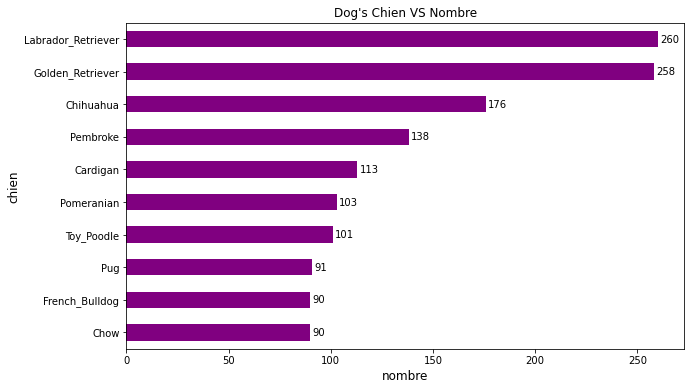

In [108]:
# Tracer les 10 races les plus courantes:
plt.figure(figsize=(10,6))
df_master['chien'].value_counts()[0:10].sort_values(ascending=True).plot(kind='barh' , color ='purple')

# Définissez x_label, y_label et titre:
plt.xlabel('nombre',size=12)
plt.ylabel('chien', size=12)
plt.title('Dog\'s Chien VS Nombre' , size=12)

# Définissez les positions x et y pour ajouter du texte sur chaque barre :
x = df_master['chien'].value_counts()[0:10].sort_values(ascending=True).values
y= np.arange(0,10,1)

# Ajouter du texte (montrant la valeur) sur chaque barre:
for xx, yy in zip(x,y):
    plt.text(xx+1,yy,xx , va='center')

**Résultat:** Le Labrador_Retriever est légérement plus présent que le Golden_Retriever et encore plus sur les autres race 

**Question 2:**
   > Quel race de chien est la mieux noter dans cette ensemble de données ?

In [109]:
# Ressortir le top 10 des race les mieux noter
top_10 = df_master.groupby('chien')['rating_numerator'].mean().sort_values(ascending= False)[0:10]
top_10

chien
Pedestal              14.0
Military_Uniform      14.0
Pole                  14.0
Wreck                 14.0
Orangutan             14.0
Theater_Curtain       14.0
Palace                14.0
Hand-Held_Computer    13.5
Upright               13.0
Printer               13.0
Name: rating_numerator, dtype: float64

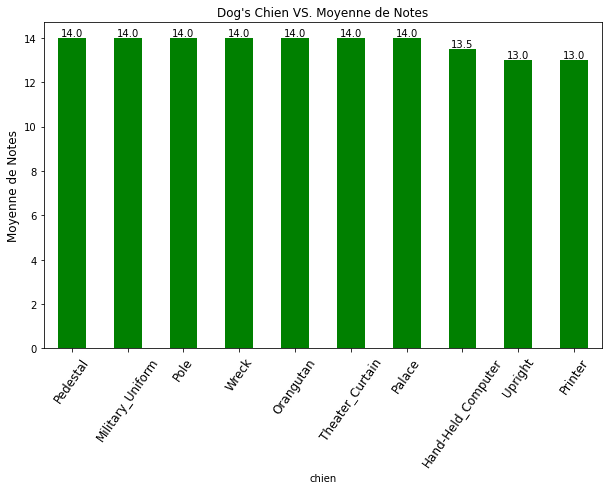

In [110]:
# Ressortir le graphe de ce top 10 associer à la moyenne des notes de rating_numerator
plt.figure(figsize=(10,6))
top_10.plot(kind='bar' , color='green')
plt.xticks(rotation= 55 , size= 12)
plt.xlabel('chien' , size=10)
plt.ylabel('Moyenne de Notes' , size= 12)
plt.title('Dog\'s Chien VS. Moyenne de Notes');

y= df_master.groupby('chien')['rating_numerator'].mean().sort_values(ascending= False).round(2)
x= np.arange(0,10,1)

for xx,yy in zip(x,y):
    plt.text(xx, yy+.1 , yy , ha='center')

**Résultat 2:** On constate que plusieurs race sont mieux noter que les autres

**Question 3:**
> Quelle race a obtenu le plus grand nombre moyen de retweets et de favoris ?

In [207]:
# Créer deux liste contenant les moyennes de retweet et de nombres de favories de chaque race de chien
top_retweets = df_master.groupby('chien')['retweet_count'].mean()[0:10].sort_values(ascending=False)
top_favorites = df_master.groupby('chien')['favorite_count'].mean()[0:10].sort_values(ascending=False)

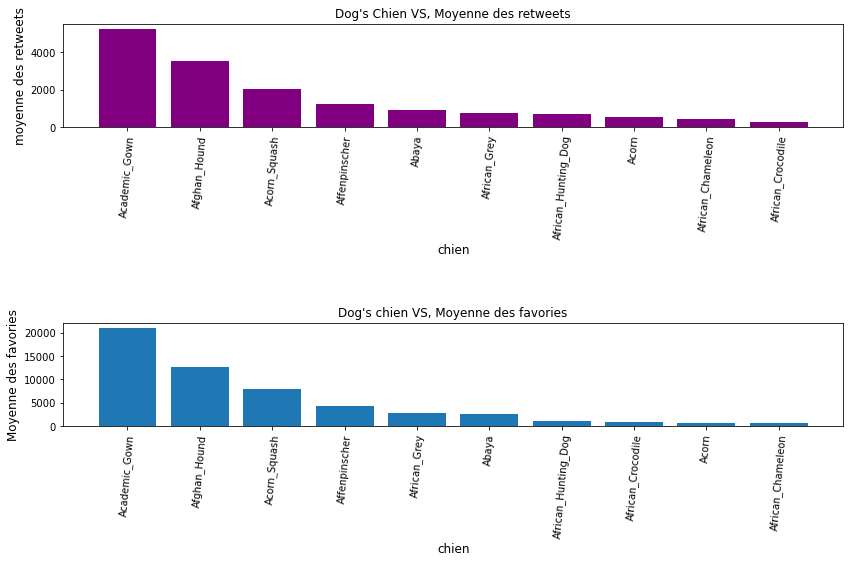

In [209]:
# Tracer les figures permettant d'observer la relation entre la race de chien et les retweet ainsi que du nombres de favories
figure= plt.figure(figsize=(13,9))

plt.subplot(2,1,1)
plt.bar(top_retweets.index, top_retweets.values , color='purple')
plt.ylabel('moyenne des retweets' , size= 12)
plt.xlabel('chien' , size= 12)
plt.title('Dog\'s Chien VS, Moyenne des retweets')
plt.xticks(rotation =85)


plt.subplot(2,1,2)
plt.bar(top_favorites.index , top_favorites.values)
plt.ylabel('Moyenne des favories' , size= 12)
plt.xlabel('chien' , size= 12)
plt.title('Dog\'s chien VS, Moyenne des favories')
plt.xticks(rotation = 85)

figure.tight_layout(pad=5)

**Résultat 3:** Dans les deux cas on constate que Academic_gown est plus favorie et obtient plus de retweet que les autres

**Question 4:**
> Avons-nous de bons résultats sur nos prédictions ?

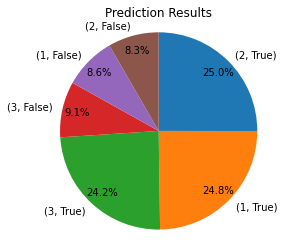

In [214]:
# Tracer le graphe sur le nombres de predictions vrai et fausses
results = df_master.groupby('num_pred')['result'].value_counts().sort_values(ascending=False)
plt.pie(results, labels=results.index, autopct='%1.1f%%', startangle=90,
         pctdistance=0.85, counterclock = False, labeldistance=1.1)
plt.axis('square')
plt.title('Prediction Results');

**Résultat 4:** Nous observons que la prédiction 2 est plus vrai que la 1 et la 3. Et que la prédiction 3 a plus de valeur fausse que les 2 autres

**Question 5:**
> Quels sont nos 4 meilleurs stades canins ?

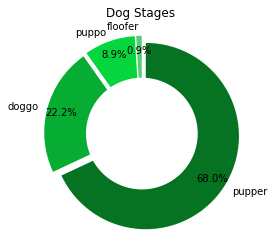

In [211]:
# Dessinez un diagramme circulaire pour les types les plus importantes de chiens

# couleur
colors = ['#057322','#07ad33','#06d63e','#56cc75']
# Dégradation
explode = (0.05, 0.05, 0.05, 0.05)

#Top 4 de dog_stage
stages_pie = df_master.Dog_stage.value_counts()[:5]

plt.pie(stages_pie, colors = colors, labels=stages_pie.index, autopct='%1.1f%%', startangle=90,
         pctdistance=0.85, explode = explode, counterclock = False, labeldistance=1.1)
plt.axis('square');

centre_circle = plt.Circle((0,0),0.60, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title('Dog Stages');
plt.show()

**Résultat 5:** On aperçoit réellement que pupper est plus présent que les autres à plus de 40%

<a id="concl"></a>
## Conclusion
- Nous avons conf. = 1, il doit s'agir d'une image claire pour une race spécifique de chien.
- Certains chiens ont obtenu une note de 1/10, c'est bizarre dans un tel compte.
- La plupart des tweets n'ont qu'une seule image.
- Toutes les variables numériques ont une distribution asymétrique à droite, ce qui signifie que les valeurs les plus faibles se sont produites le plus.
- Nous avons un bon pourcentage de cas de prédiction élevée.
- La prédictions 2 semble plus véridique que les deux autres et la 3 a lus de valeurs fausse.
- La seule relation que nous pouvons mentionner ici est la forte corrélation positive entre le nombre de retweets et le nombre de favoris. et cela a du sens.
- La plupart des tweets avaient moins de 10 000 retweets et jusqu'à 32 000 favoris.
- Nous avons quelques tweets qui ont eu beaucoup plus de favoris et de retweets.
- Les notes moyennes les plus élevées ne sont pas du tout associées aux chiens.
- Je pensais que ce nombre d'images donnerait des résultats plus fiables, mais cela ne semble pas être vrai.
- La plupart des résultats de confiance élevée étaient basés sur 1 image.